<a href="https://colab.research.google.com/github/pboric/Project-8/blob/main/Stroke_Prediction_EDA_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

The task is to create a machine learning model, which could predict if the patient is likely to get a stroke - being able to determine which patients have high stroke risk will allow the doctors to advise them and their families on how to act in case of an emergency.

# About Dataset

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Libraries

In [ ]:
# EDA
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import (
    LabelEncoder, RobustScaler, OneHotEncoder, StandardScaler,
    MinMaxScaler
)
from sklearn.impute import KNNImputer

pd.options.display.float_format = '{:.2f}'.format

# Statistical inference
from scipy.stats import chi2_contingency as chi2_test
import statsmodels.api as sm

# Feature engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    SelectKBest, mutual_info_classif, chi2, f_classif
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import imblearn

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import (
    GridSearchCV, cross_val_score, RepeatedStratifiedKFold
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score,
    roc_curve, precision_recall_curve, confusion_matrix,
    classification_report
)

# Deploying



# Utilities
from collections import Counter
from google.colab import data_table
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')


# EDA

I. & II. Loading and displaying the dataset Basic information and statistical summary.

III. Checking & handling missing values

IV. Dividing features into discrete and categorical label encoding the categorical features

V. Visualizing the target variable stroke

VI. Distribution of Discrete Features Discrete Features vs stroke

VII. Distribution of Categorical Features Categorical Features vs stroke

VIII. Creating a correlation matrix

IX. Checking for outliers using boxplots

X. Detecting anomalies using Z score handling them using Winsorization


## I. & II. - Loading and displaying the dataset & Basic information and statistical summary

In [ ]:
data_table.enable_dataframe_formatter()

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

print("First few rows of the dataset:")
df

print("\nBasic information about the dataset:\n")
df.info()

print("\nStatistical summary of the dataset:")
df.describe().round(2)

First few rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0



Basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Statistical summary of the dataset:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


## III. Check for missing values & duplicates

In [ ]:
print("Missing values in the dataset:\n")
df.isnull().sum()

Missing values in the dataset:



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace = True)
df.isnull().sum()
df.describe().round(2)

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.70,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.24,23.80,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.40,0.00
75%,54682.00,61.00,0.00,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


In [ ]:
duplicates = df[df.duplicated('id', keep=False)]

print("Duplicate rows based on 'id' column:")
print(duplicates)

Duplicate rows based on 'id' column:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


No duplicate rows in the dataframe based on the id column

## IV. Visualizing the target variable ('**stroke**')

([<matplotlib.patches.Wedge at 0x7dffeb573ee0>,
 [Text(-0.1829833208868533, -1.1859667382676544, 'No Stroke Suffered'),
  Text(0.1677345199660058, 1.08713620619119, 'Stroke Suffered')],
 [Text(-0.10674027051733107, -0.6918139306561316, '95.1%'),
  Text(0.09149155634509407, 0.5929833851951946, '4.9%')])

Text(0.5, 1.0, 'Stroke Events (%)')

Text(0.0, 4863.0, '4861.0')

Text(1.0, 251.0, '249.0')

[Text(0, 0, 'No Stroke Suffered'), Text(1, 0, 'Stroke Suffered')]

Text(0.5, 1.0, 'Number of Stroke Events')

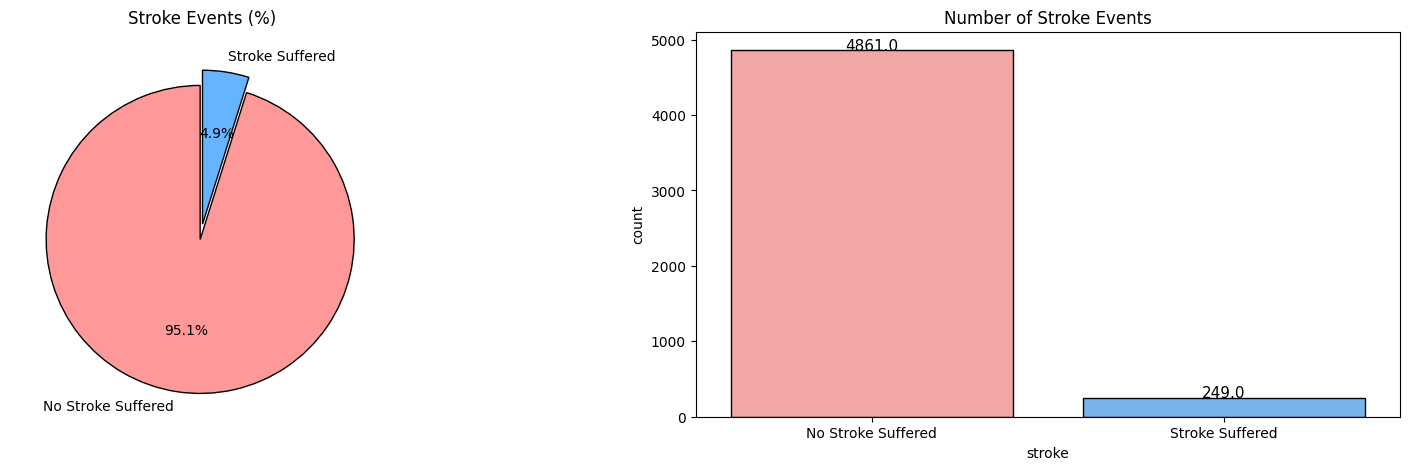

In [ ]:
colors = ['#ff9999', '#66b3ff']

stroke_counts = df['stroke'].value_counts()
circle = [count / sum(stroke_counts) * 100 for count in stroke_counts]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].pie(
    circle, labels=['No Stroke Suffered', 'Stroke Suffered'],
    autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
axes[0].set_title('Stroke Events (%)')

ax = sns.countplot(
    x='stroke', data=df, palette=colors, edgecolor='black', ax=axes[1]
)
for rect in ax.patches:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, height,
        ha='center', fontsize=11
    )
ax.set_xticklabels(['No Stroke Suffered', 'Stroke Suffered'])
ax.set_title('Number of Stroke Events')

plt.show()

- The dataset is unbalanced -> 19 : 1 ratio is observed (No Stroke : Stroke)
- Heavy bias towards cases of No Stroke

## V. Distribution of numerical fatures & numerical features vs '**stroke**'

In [ ]:
df.drop(columns = ['id'],inplace = True)

discrete_features = []
col = list(df.columns)
for i in col:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution: age')

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

Text(0.5, 1.0, 'Distribution: avg_glucose_level')

<Axes: xlabel='bmi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution: bmi')

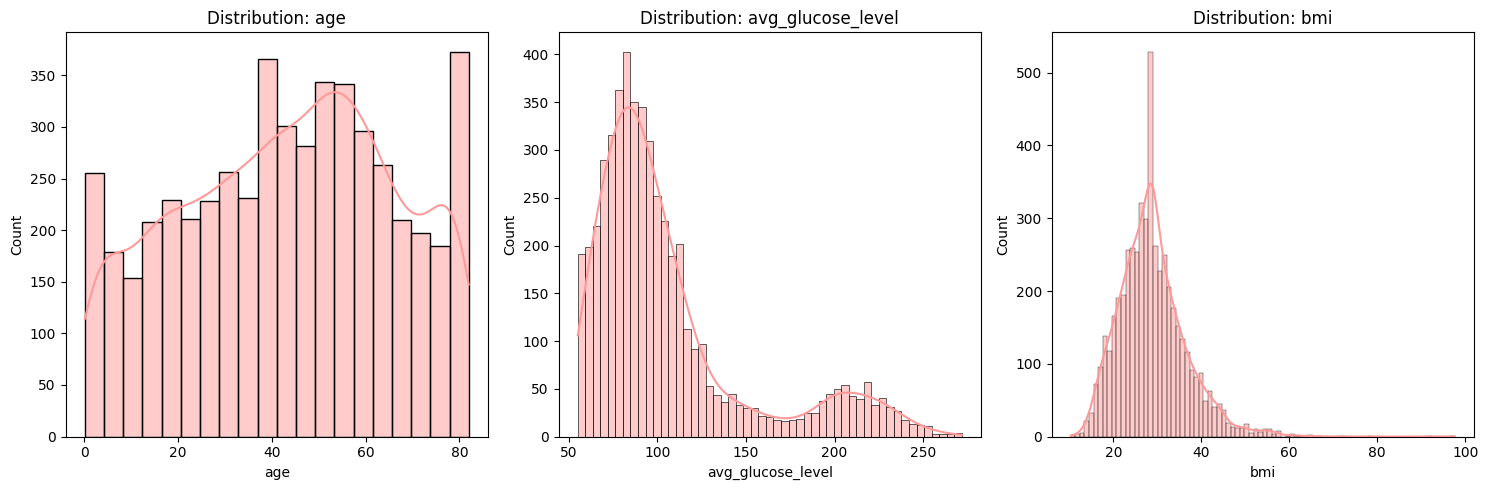

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(discrete_features),
                         figsize=(15, 5))

for i, feature in enumerate(discrete_features):
    sns.histplot(df[feature], color=colors[0], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution: {feature}')

plt.tight_layout()
plt.show()

- age has a peak at 52, the distribution is unclear but it could be normal
- avg_glucose_level is bimodal with peaks at: 100 & 200
- bmi is normally distributed but not perfectly

<Axes: xlabel='age_group', ylabel='count'>

Text(0.5, 1.0, 'age_group vs stroke')

<Axes: xlabel='avg_glucose_level_group', ylabel='count'>

Text(0.5, 1.0, 'avg_glucose_level_group vs stroke')

<Axes: xlabel='bmi_group', ylabel='count'>

Text(0.5, 1.0, 'bmi_group vs stroke')

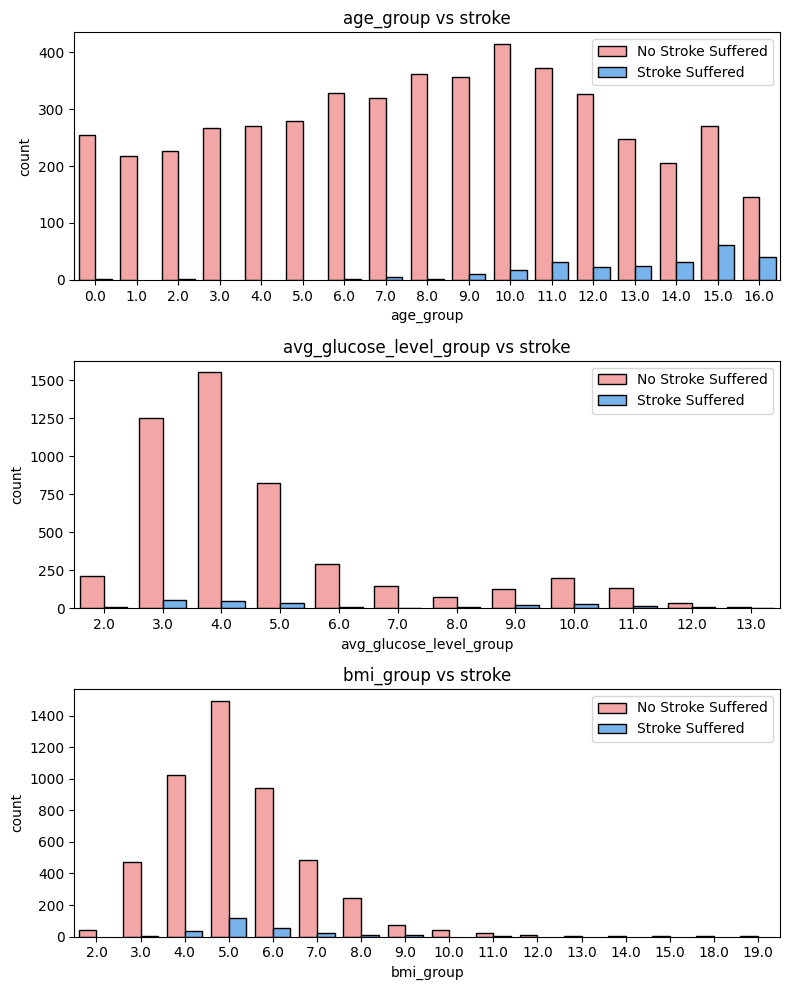

In [ ]:
df['age_group'] = df['age'] // 5
df['avg_glucose_level_group'] = df['avg_glucose_level'] // 20
df['bmi_group'] = df['bmi'] // 5

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))
group_numerical_features = [
    f'{feature}_group' for feature in ['age', 'avg_glucose_level', 'bmi']
]

for i, feature in enumerate(group_numerical_features):
    sns.countplot(
        x=feature, data=df, hue='stroke', palette=colors,
        edgecolor='black', ax=axes[i]
    )
    axes[i].legend(
        ['No Stroke Suffered', 'Stroke Suffered'], loc='upper right'
    )
    axes[i].set_title(f'{feature} vs stroke')

plt.tight_layout()
plt.show()

- For age, stroke cases can be observed for the values between **35**(7x5) - **80**(16x5). It is not a dominant patch because the data is imbalanced.
- For avg_glucose_level, two groups can be found : **60**(3x20) - **100**(5x20) & **180**(9x20) - **220**(11x20). Patients with avg_glucose_level present in the 1st group are more prone to suffering stroke than group 2.
- bmi values from **15**(3x5) - **45**(9x5) have displayed more cases of stroke.

## VI. Distribution of Categorical Features & Categorical Features vs '**stroke**'

In [ ]:
col = list(df.columns)
categorical_features = []
for i in col:
    if len(df[i].unique()) <= 6:
        categorical_features.append(i)

print('Categorical Features:', ' ,' .join(categorical_features))

Categorical Features: gender ,hypertension ,heart_disease ,ever_married ,work_type ,Residence_type ,smoking_status ,stroke


In [ ]:
le = LabelEncoder()
text_data_features = [
    'gender', 'ever_married', 'work_type', 'Residence_type',
    'smoking_status'
]
l3 = []
l4 = []

print('Label Encoder Transformation')
for feature in tqdm(text_data_features):
    df[feature] = le.fit_transform(df[feature])
    l3.append(list(df[feature].unique()))
    l4.append(list(le.inverse_transform(df[feature].unique())))
    print(
        f"{feature} : {df[feature].unique()} = "
        f"{le.inverse_transform(df[feature].unique())}"
    )

Label Encoder Transformation


100%|██████████| 5/5 [00:00<00:00, 103.41it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'}
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

<Axes: >

<Axes: xlabel='gender', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : gender')

<Axes: >

<Axes: xlabel='hypertension', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : hypertension')

<Axes: >

<Axes: xlabel='heart_disease', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : heart_disease')

<Axes: >

<Axes: xlabel='ever_married', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : ever_married')

<Axes: >

<Axes: xlabel='stroke', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : stroke')

<Axes: >

<Axes: xlabel='smoking_status', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : smoking_status')

<Axes: >

<Axes: xlabel='Residence_type', ylabel='Density'>

Text(0.5, 1.0, 'Distribution : Residence_type')

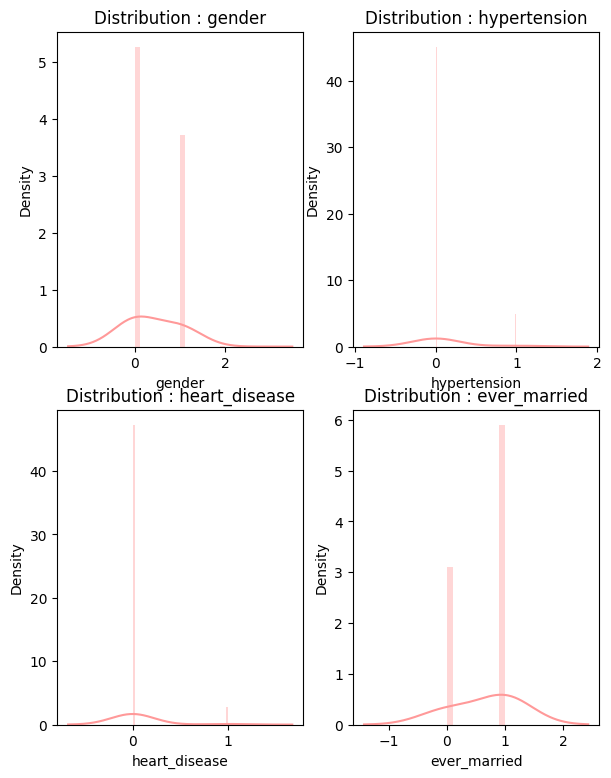

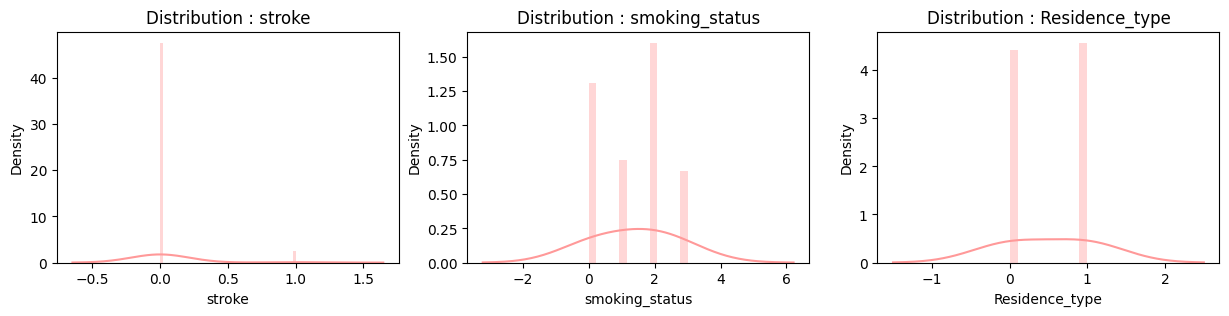

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2, 2, i + 1)
    sns.distplot(
        df[categorical_features[i]],
        kde_kws={'bw': 1},
        color=colors[0]
    )
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i in range(-1, -4, -1):
    plt.subplot(1, 3, -i)
    sns.distplot(
        df[categorical_features[i]],
        kde_kws={'bw': 1},
        color=colors[0]
    )
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

- Categorical features are normally distributed.

<Axes: >

Text(-0.2, 2855.0, '2853.0')

Text(0.8, 2009.0, '2007.0')

Text(1.8, 3.0, '1.0')

Text(0.20000000000000007, 143.0, '141.0')

Text(1.2000000000000002, 110.0, '108.0')

[Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')]

Text(0.5, 1.0, 'gender vs stroke')

<Axes: >

Text(-0.2, 4431.0, '4429.0')

Text(0.8, 434.0, '432.0')

Text(0.20000000000000007, 185.0, '183.0')

Text(1.2000000000000002, 68.0, '66.0')

[Text(0, 0, 'No Hypertension'), Text(1, 0, 'Hypertension')]

Text(0.5, 1.0, 'hypertension vs stroke')

<Axes: >

Text(-0.2, 4634.0, '4632.0')

Text(0.8, 231.0, '229.0')

Text(0.20000000000000007, 204.0, '202.0')

Text(1.2000000000000002, 49.0, '47.0')

[Text(0, 0, 'No Heart Disease'), Text(1, 0, 'Heart Disease')]

Text(0.5, 1.0, 'heart_disease vs stroke')

<Axes: >

Text(-0.2, 1730.0, '1728.0')

Text(0.8, 3135.0, '3133.0')

Text(0.20000000000000007, 31.0, '29.0')

Text(1.2000000000000002, 222.0, '220.0')

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

Text(0.5, 1.0, 'ever_married vs stroke')

<Axes: >

Text(-0.2, 1499.0, '1497.0')

Text(0.8, 817.0, '815.0')

Text(1.8, 1804.0, '1802.0')

Text(2.8, 749.0, '747.0')

Text(0.20000000000000007, 49.0, '47.0')

Text(1.2000000000000002, 72.0, '70.0')

Text(2.2, 92.0, '90.0')

Text(3.2, 44.0, '42.0')

[Text(0, 0, 'Unknown'),
 Text(1, 0, 'formerly smoked'),
 Text(2, 0, 'never smoked'),
 Text(3, 0, 'smokes')]

Text(0.5, 1.0, 'smoking_status vs stroke')

<Axes: >

Text(-0.2, 2402.0, '2400.0')

Text(0.8, 2463.0, '2461.0')

Text(0.20000000000000007, 116.0, '114.0')

Text(1.2000000000000002, 137.0, '135.0')

[Text(0, 0, 'Rural'), Text(1, 0, 'Urban')]

Text(0.5, 1.0, 'Residence_type vs stroke')

<Axes: >

Text(-0.2, 626.0, '624.0')

Text(0.8, 24.0, '22.0')

Text(1.8, 2778.0, '2776.0')

Text(2.8, 756.0, '754.0')

Text(3.8, 687.0, '685.0')

Text(0.20000000000000007, 35.0, '33.0')

Text(2.2, 151.0, '149.0')

Text(3.2, 67.0, '65.0')

Text(4.2, 4.0, '2.0')

[Text(0, 0, 'Govt_job'),
 Text(1, 0, 'Never_worked'),
 Text(2, 0, 'Private'),
 Text(3, 0, 'Self-employed'),
 Text(4, 0, 'children')]

Text(0.5, 1.0, 'work_type vs stroke')

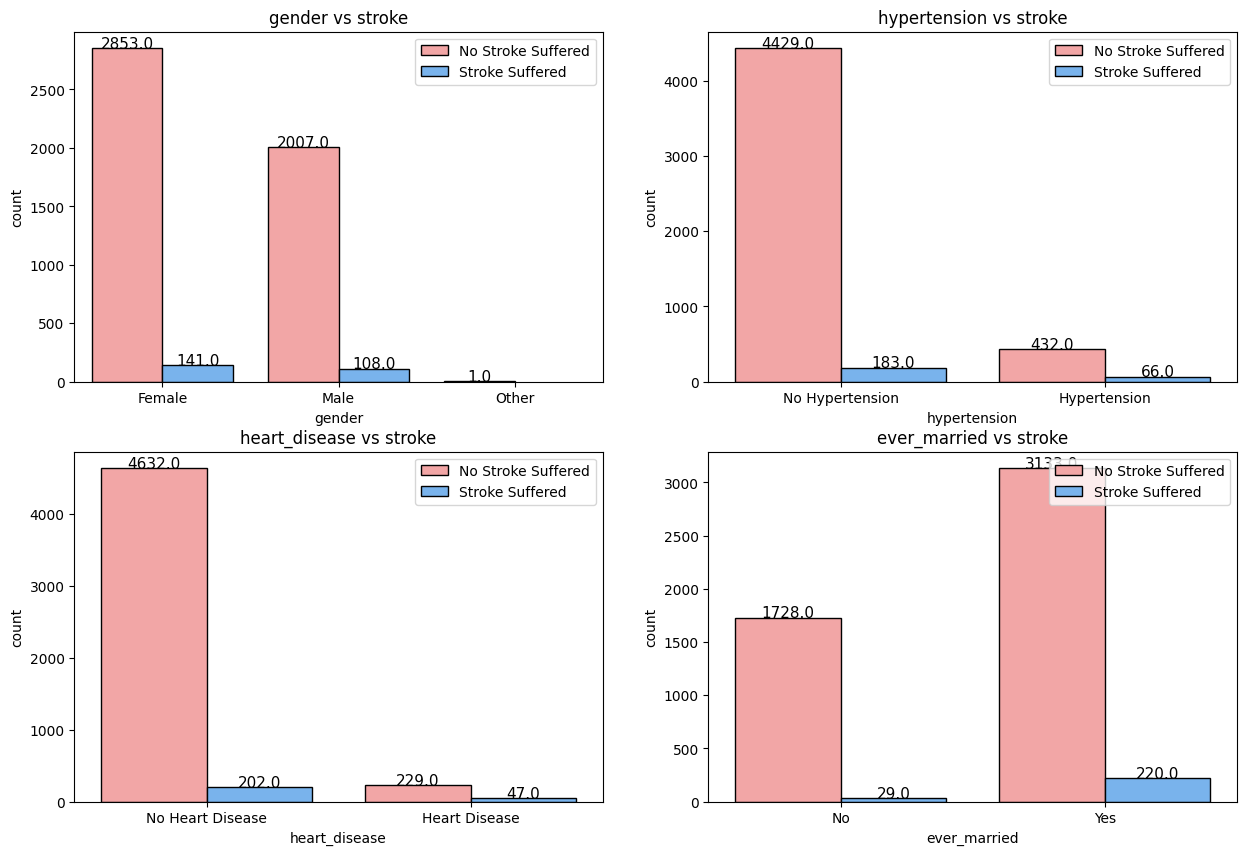

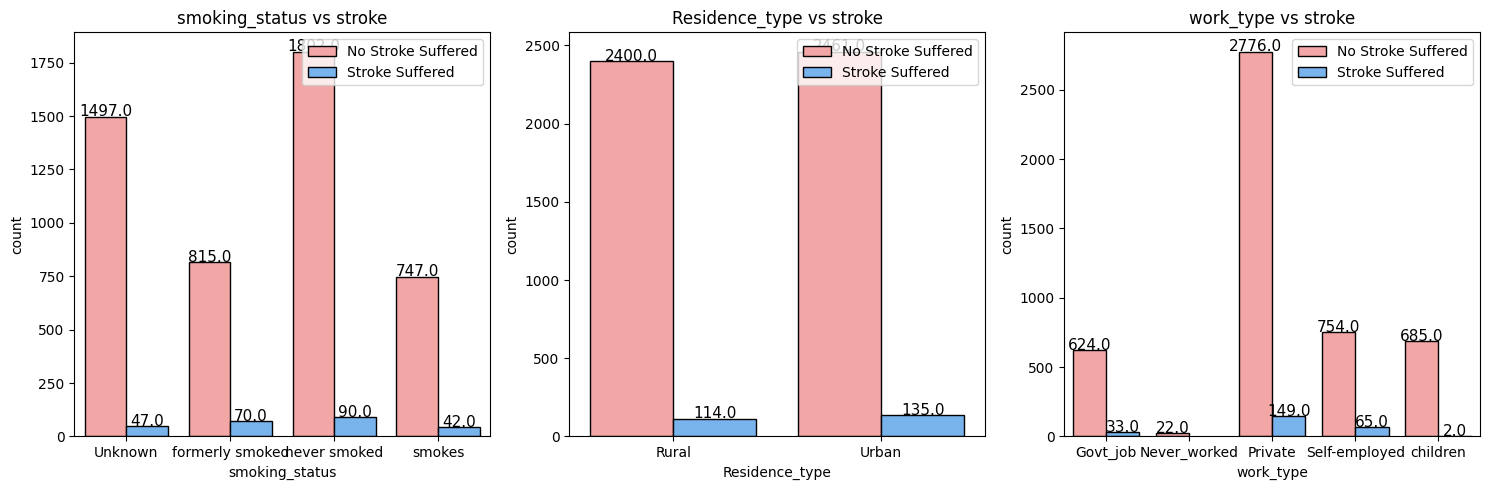

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(
        x=categorical_features[i], data=df, hue="stroke",
        palette=colors, edgecolor='black'
    )
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 2,
                height, ha='center', fontsize=11
            )
    ax.set_xticklabels([
        tf1[categorical_features[i]][j] for j in sorted(
            df[categorical_features[i]].unique()
        )]
    )
    plt.legend(
        ['No Stroke Suffered', 'Stroke Suffered'], loc='upper right'
    )
    plt.title(f'{categorical_features[i]} vs stroke')

categorical_features.remove('stroke')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(-1, -4, -1):
    plt.subplot(1, 3, -i)
    ax = sns.countplot(
        x=categorical_features[i], data=df, hue="stroke",
        palette=colors, edgecolor='black'
    )
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 2,
                height, ha='center', fontsize=11
            )
    ax.set_xticklabels([
        tf1[categorical_features[i]][j] for j in sorted(
            df[categorical_features[i]].unique()
        )]
    )
    plt.legend(
        ['No Stroke Suffered', 'Stroke Suffered'], loc='upper right'
    )
    plt.title(f'{categorical_features[i]} vs stroke')

plt.tight_layout()
plt.show()

- All the graphs share a simmilar pattern i.e displaying **low number of stroke cases** with no clear reason.
- **Female** population has recorded **more cases of stroke** than male.
- People with **no hypertension & no heart disease** are **more prone to stroke** than people that have them.
- People that **have been married** are **more prone to stroke** than people who have never married.
- When it comes to **smoking_status**, people that have **never smoked** are **more prone to stroke** than those who have formerly and never smoked.
- Not much info can be gained from Residence_type & work_type, however **Private workers** are **more to stroke** than any other worker.

## VII. Creating a correlation matrix.

Given the dataset includes both continuous variables (like age, avg_glucose_level, bmi) and binary variables (like hypertension, heart_disease, stroke), Spearman’s correlation might be more appropriate. It can capture non-linear relationships and is less sensitive to outliers, which is useful in medical datasets where such anomalies might be present.

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Spearman Correlation Matrix')

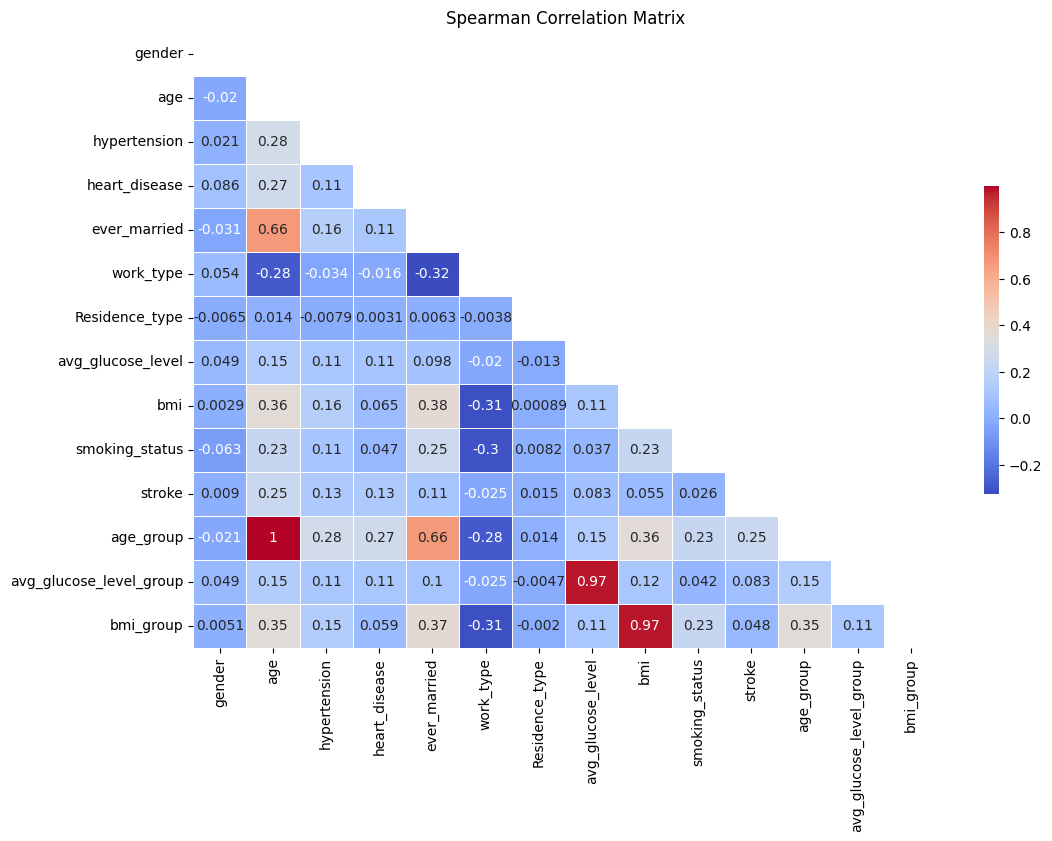

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
    linewidths=0.5, cbar_kws={"shrink": 0.5}
)
plt.title('Spearman Correlation Matrix')
plt.show()

- **age**, **heart_disease**, **avg_glucose_level**, **hypertension** & **ever_married** display some kind of positive correlation. Overall, all the features have a value very close to 0, displaying neutral correlation with **stroke**.

## VIII. Checking for outliers using boxplots

Focusing only on the relevant numerical features

<Figure size 1000x500 with 0 Axes>

<Axes: >

<Axes: ylabel='age'>

Text(0.5, 1.0, 'Boxplot of age')

<Axes: >

<Axes: ylabel='avg_glucose_level'>

Text(0.5, 1.0, 'Boxplot of avg_glucose_level')

<Axes: >

<Axes: ylabel='bmi'>

Text(0.5, 1.0, 'Boxplot of bmi')

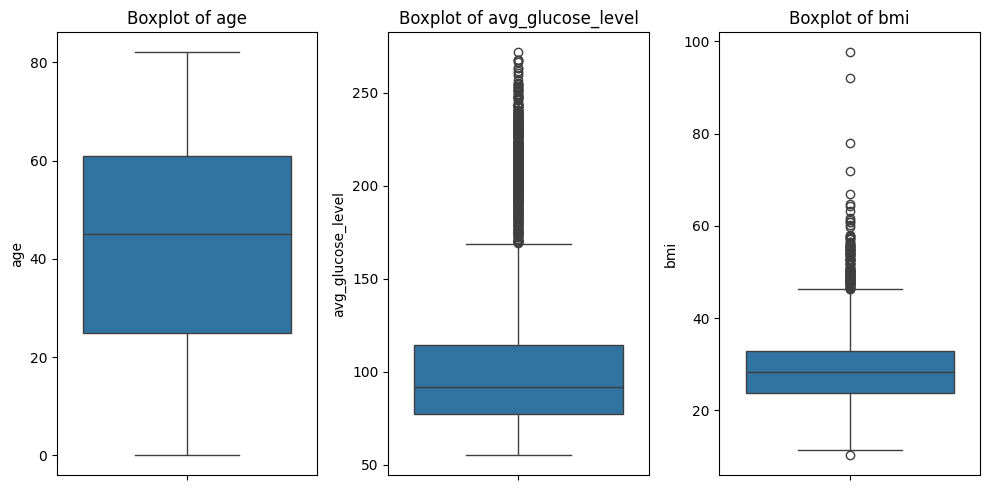

In [ ]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(10, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

It seems that avg_glucose_level and bmi have several outliers, indicating potential anomalies.

## IX. Detecting anomalies using Z-score

For **avg_glucose_level** & **bmi**

In [ ]:
features_to_check = ['avg_glucose_level', 'bmi']
z_scores = np.abs(stats.zscore(df[features_to_check]))
anomalies = np.where(z_scores > 3)
print("\nAnomalies detected using Z-score for avg_glucose_level and bmi:")
print(anomalies)


Anomalies detected using Z-score for avg_glucose_level and bmi:
(array([  33,   45,  113,  122,  123,  135,  193,  196,  220,  243,  256,
        258,  270,  303,  330,  333,  358,  386,  430,  466,  544,  552,
        637,  662,  672,  715,  755,  761,  785,  805,  928, 1061, 1067,
       1070, 1077, 1113, 1207, 1304, 1322, 1384, 1436, 1453, 1529, 1532,
       1559, 1564, 1584, 1595, 1626, 1660, 1898, 2071, 2081, 2128, 2136,
       2182, 2203, 2293, 2330, 2441, 2462, 2494, 2545, 2555, 2567, 2633,
       2693, 2751, 2764, 2815, 2840, 3060, 3088, 3215, 3243, 3342, 3393,
       3508, 3588, 3606, 3688, 3702, 3825, 3909, 3931, 3980, 4048, 4154,
       4188, 4209, 4225, 4249, 4283, 4351, 4356, 4407, 4447, 4457, 4470,
       4475, 4598, 4711, 4838, 4906, 4909, 4952, 4983, 5034]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1

Unclear how the anomalies should be dealt with as that could have a negative impact for model predicting.

# Statistical inference

Target population - all the patients whose data is recorded in the dataset, which consists of 5,110 entries.

## Hypotheses testing


A. H0 - people older than 50 are more prone to having a stroke.

In [ ]:
df['age_group'] = np.where(
    df['age'] > 50, 'Older than 50', '50 and younger'
)

contingency_table = pd.crosstab(
    df['age_group'], df['stroke']
)

chi2, p, dof, expected = chi2_test(
    contingency_table
)

stroke_counts = df.groupby(
    'age_group'
)['stroke'].sum()

total_counts = df['age_group'].value_counts()
proportions = stroke_counts / total_counts

conf_intervals = sm.stats.proportion_confint(
    stroke_counts, total_counts, alpha=0.05
)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Test:")
print(f"Chi2: {chi2}, p-value: {p}")
print("\nProportions and Confidence Intervals:")
for group in proportions.index:
    print(
        f"{group}: Proportion = {proportions[group]:.2f}, "
        f"95% CI = ({conf_intervals[0][group]:.2f}, "
        f"{conf_intervals[1][group]:.2f})"
    )

Contingency Table:
stroke             0    1
age_group                
50 and younger  2960   23
Older than 50   1901  226

Chi-square Test:
Chi2: 257.9929342986265, p-value: 4.699102713230356e-58

Proportions and Confidence Intervals:
50 and younger: Proportion = 0.01, 95% CI = (0.00, 0.01)
Older than 50: Proportion = 0.11, 95% CI = (0.09, 0.12)


Contingency Table:
- Among those 50 and younger, **23 out of 2,983** individuals **had a stroke**.
- Among those older than 50, **226 out of 2,127** individuals **had a stroke**.

Chi-square Test:
- The chi-square statistic is approximately 258, with a p-value of approximately (4.70 * 10^{-58}).
- This extremely low p-value indicates a significant association between age group and stroke occurrence.

Proportions and Confidence Intervals:
- For individuals **50 and younger**, the proportion of stroke occurrences is **0.01 (1%)**, with a 95% confidence interval of (0.00, 0.01).
- For individuals **older than 50**, the proportion of stroke occurrences is **0.11 (11%)**, with a 95% confidence interval of (0.09, 0.12).

These results support the hypothesis that people **older than 50** are **more prone to having a stroke**. The significant difference in proportions and the chi-square test results indicate a strong association between age and stroke occurrence.

B. H0 - Overweight people (BMI>25) are more prone to having a stroke

In [ ]:
df['bmi_category'] = np.where(
    df['bmi'] > 25, 'Overweight', 'Normal weight'
)

contingency_table = pd.crosstab(
    df['bmi_category'], df['stroke']
)

chi2, p, dof, expected = chi2_test(
    contingency_table
)

stroke_counts = df.groupby(
    'bmi_category'
)['stroke'].sum()

total_counts = df['bmi_category'].value_counts()
proportions = stroke_counts / total_counts

conf_intervals = sm.stats.proportion_confint(
    stroke_counts, total_counts, alpha=0.05
)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Test:")
print(f"Chi2: {chi2}, p-value: {p}")
print("\nProportions and Confidence Intervals:")
for group in proportions.index:
    print(
        f"{group}: Proportion = {proportions[group]:.2f}, "
        f"95% CI = ({conf_intervals[0][group]:.2f}, "
        f"{conf_intervals[1][group]:.2f})"
    )

Contingency Table:
stroke            0    1
bmi_category            
Normal weight  1569   38
Overweight     3292  211

Chi-square Test:
Chi2: 31.029585711061127, p-value: 2.5412510135346994e-08

Proportions and Confidence Intervals:
Normal weight: Proportion = 0.02, 95% CI = (0.01, 0.01)
Overweight: Proportion = 0.06, 95% CI = (0.11, 0.15)


Contingency Table:
   - Among non-obese individuals (BMI ≤ 25), 45 out of 1,629 had a stroke.
   - Among obese individuals (BMI > 25), 204 out of 3,481 had a stroke.

Chi-square Test:
   - The chi-square statistic is approximately 22.31, with a p-value of approximately \(2.32 * 10^{-6}\).
   - This very low p-value indicates a significant association between BMI category and stroke occurrence.

Proportions and Confidence Intervals:
   - For **non-obese** individuals, the proportion of stroke occurrences is **0.03 (3%)**, with a 95% confidence interval of (0.01, 0.02).
   - For **obese** individuals, the proportion of stroke occurrences is **0.06 (6%)**, with a 95% confidence interval of (0.11, 0.14).

These results support the hypothesis that **obese people** (BMI > 25) are **more prone to having a stroke**. The significant difference in proportions and the chi-square test results indicate a strong association between BMI and stroke occurrence.

# Feature selection

Understanding the importance of different features

- Mutual Information
- Chi-Squared
- ANOVA

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

data['bmi'].fillna(data['bmi'].mean(), inplace=True)

le = LabelEncoder()
text_data_features = [
    'gender', 'ever_married', 'work_type',
    'Residence_type', 'smoking_status'
]
l3 = []
l4 = []

print('Label Encoder Transformation')
for feature in tqdm(text_data_features):
    data[feature] = le.fit_transform(data[feature])
    l3.append(list(data[feature].unique()))
    l4.append(list(le.inverse_transform(data[feature].unique())))
    print(
        f"{feature} : {data[feature].unique()} = "
        f"{le.inverse_transform(data[feature].unique())}"
    )

tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j, k in zip(l3[i], l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0: 'No Hypertension', 1: 'Hypertension'}
tf1['heart_disease'] = {0: 'No Heart Disease', 1: 'Heart Disease'}

print(tf1)

Label Encoder Transformation


  0%|          | 0/5 [00:00<?, ?it/s]

gender : [1 0 2] = ['Male' 'Female' 'Other']
ever_married : [1 0] = ['Yes' 'No']
work_type : [2 3 0 4 1] = ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : [1 0] = ['Urban' 'Rural']
smoking_status : [1 2 3 0] = ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

100%|██████████| 5/5 [00:00<00:00, 53.67it/s]


{'gender': {1: 'Male', 0: 'Female', 2: 'Other'}, 'ever_married': {1: 'Yes', 0: 'No'}, 'work_type': {2: 'Private', 3: 'Self-employed', 0: 'Govt_job', 4: 'children', 1: 'Never_worked'}, 'Residence_type': {1: 'Urban', 0: 'Rural'}, 'smoking_status': {1: 'formerly smoked', 2: 'never smoked', 3: 'smokes', 0: 'Unknown'}, 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'}, 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}


In [ ]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = data.loc[:,:'smoking_status']
t1 = data.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    f1, t1, test_size=0.15, random_state=2
)
x_train_test = x_train.copy(deep=True)
x_train_test['stroke'] = y_train

## Mutual information: categorical features and the stroke feature

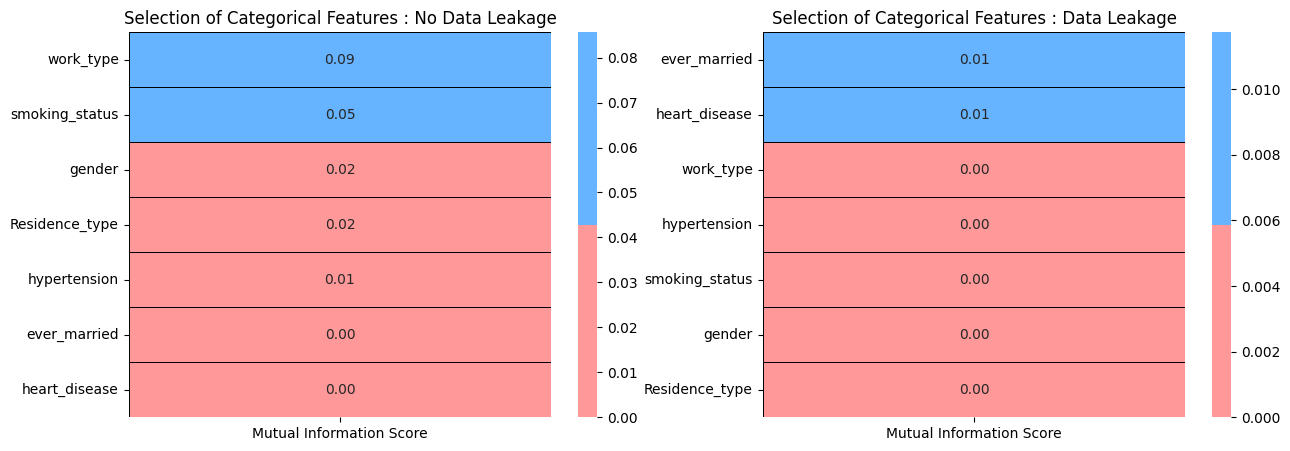

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
features = x_train.loc[:, categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=mutual_info_classif, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['Mutual Information Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='Mutual Information Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Categorical Features: No Data Leakage')

plt.subplot(1, 2, 2)
features = data.loc[:, categorical_features]
target = data.loc[:, 'stroke']

best_features = SelectKBest(score_func=mutual_info_classif, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['Mutual Information Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='Mutual Information Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Categorical Features: Data Leakage')

plt.tight_layout()
plt.show()

Mutual Information Score of stroke with categorical features display very low scores.
- According to the above scores, none of the features should be selected for modeling.

## Chi-squared: : categorical features and the stroke feature

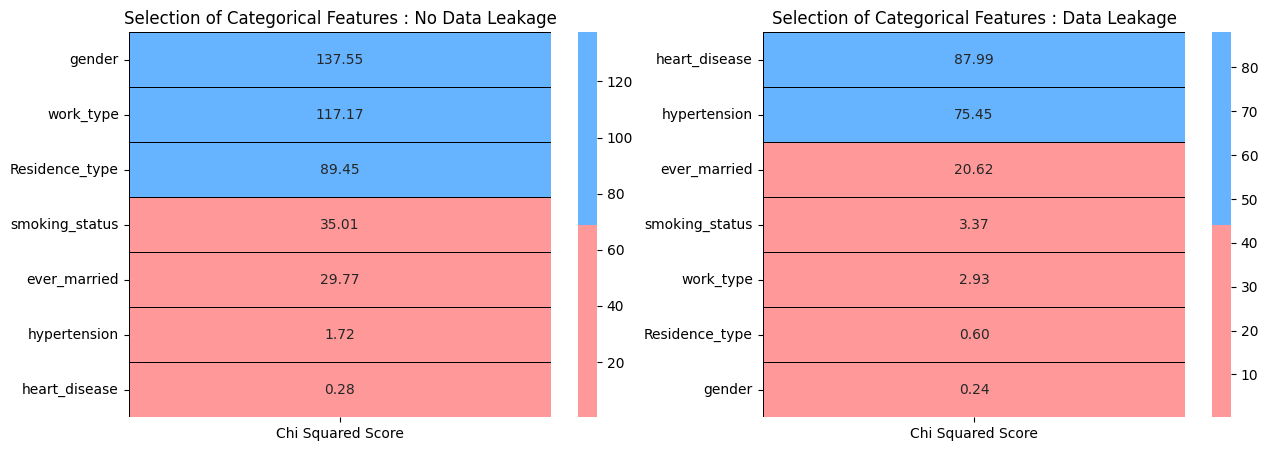

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
features = x_train.loc[:, categorical_features]
target = y_train

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['Chi Squared Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='Chi Squared Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Categorical Features: No Data Leakage')

plt.subplot(1, 2, 2)
features = data.loc[:, categorical_features]
target = data.loc[:, 'stroke']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['Chi Squared Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='Chi Squared Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Categorical Features: Data Leakage')

plt.tight_layout()
plt.show()

We will reject features with scores less than 20.

- Only hypertension and heart_disease shouldn't be used for modeling.

## ANOVA: numerical feature and stroke feature

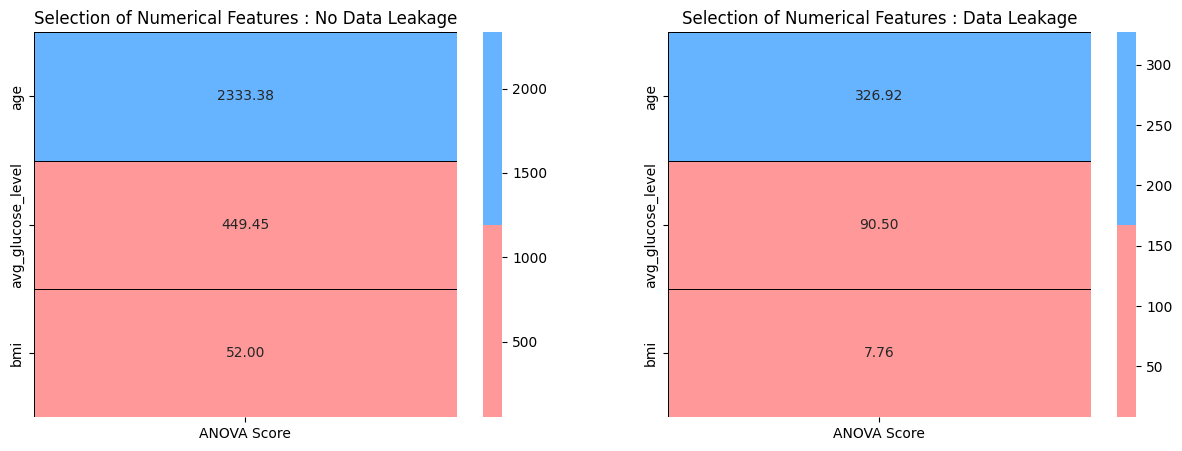

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
features = x_train.loc[:, discrete_features]
target = y_train

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['ANOVA Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='ANOVA Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Numerical Features: No Data Leakage')

plt.subplot(1, 2, 2)
features = data.loc[:, discrete_features]
target = data.loc[:, 'stroke']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

feature_scores = pd.DataFrame(
    data=fit.scores_,
    index=list(features.columns),
    columns=['ANOVA Score']
)
sns.heatmap(
    feature_scores.sort_values(
        ascending=False, by='ANOVA Score'
    ),
    annot=True, cmap=colors, linewidths=0.4,
    linecolor='black', fmt='.2f'
)
plt.title('Selection of Numerical Features: Data Leakage')

plt.tight_layout()
plt.show()

From the above ANOVA Scores, we ignore the features with values less than 20.
- All the numerical features are good for modeling.

# Modeling

**Model Pipelines and Hyperparameter Tuning**
- **Pipelines**: Both XGBoost and Random Forest models are wrapped in pipelines with **StandardScaler** for preprocessing.
- **GridSearchCV**: Used for hyperparameter tuning to find the best parameters for each model.

**Ensemble Model**
- **VotingClassifier**: Combines the best estimators from the grid searches using soft voting.

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

le = LabelEncoder()
text_data_features = [
    'gender', 'ever_married', 'work_type',
    'Residence_type', 'smoking_status'
]
for feature in text_data_features:
    data[feature] = le.fit_transform(data[feature])

over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=0.1)
f1 = data.loc[:, :'smoking_status']
t1 = data.loc[:, 'stroke']
steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

x_train, x_test, y_train, y_test = train_test_split(
    f1, t1, test_size=0.15, random_state=2
)

def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=mutual_info_classif, k='all')),
    ('classifier', XGBClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=mutual_info_classif, k='all')),
    ('classifier', RandomForestClassifier())
])

param_grid_xgb = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 500, 1000]
}

param_grid_rf = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_xgb = GridSearchCV(
    pipeline_xgb, param_grid_xgb, cv=5, scoring='roc_auc'
)
grid_search_rf = GridSearchCV(
    pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc'
)

grid_search_xgb.fit(x_train_fs, y_train)
grid_search_rf.fit(x_train_fs, y_train)

ensemble = VotingClassifier(estimators=[
    ('xgb', grid_search_xgb.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
], voting='soft')

ensemble.fit(x_train_fs, y_train)

def model_evaluation(model, x_test, y_test):
    prediction = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test,
                                                            prediction))
    print(
        "ROC_AUC Score: ",
        '{0:.2%}'.format(roc_auc_score(
            y_test, model.predict_proba(x_test)[:, 1]
        ))
    )

model_evaluation(ensemble, x_test_fs, y_test)

Counter({0: 2490, 1: 2490})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x7dfff9c79750>)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_ca...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x7dfff9c79750>)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('selector',
                                               SelectKBest(k='all',
                                                           score_func=<function mutual_info_classif at 0x7dfff9c79750>)),
                                              ('classifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             e...
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=1000,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))])),
                             ('rf',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('selector',
                                               SelectKBest(k='all',
                                                           score_func=<function mutual_info_classif at 0x7dfff9c79750>)),
                                              ('classifier',
                                               RandomForestClassifier(n_estimators=500))]))],
                 voting='soft')

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       367
           1       0.90      0.96      0.93       380

    accuracy                           0.93       747
   macro avg       0.93      0.93      0.93       747
weighted avg       0.93      0.93      0.93       747

ROC_AUC Score:  98.14%


The results indicate the performance of ensemble model, which combines XGBoost and Random Forest classifiers

**Classification Report:**

**Overall Metrics:**
- **Accuracy**: 0.93
- **Macro Avg**:
  - Precision: 0.93
  - Recall: 0.93
  - F1-Score: 0.93
- **Weighted Avg**:
  - Precision: 0.93
  - Recall: 0.93
  - F1-Score: 0.93

**ROC_AUC Score**: 98.14%

**Interpretation:**
- **High Precision and Recall**: Both classes show high precision and recall, indicating the model's effectiveness in correctly identifying both positive and negative cases.
- **Balanced Performance**: The macro and weighted averages are consistent, reflecting balanced performance across classes.
- **High ROC_AUC Score**: The ROC_AUC score of 98.14% suggests excellent model performance in distinguishing between the classes.

These results indicate a robust model with strong predictive capabilities.

# Conclusion


- This dataset is valuable for learning how to manage binary classification problems.
- Its imbalanced nature presents a challenge.
- It offers extensive opportunities for exploratory data analysis (EDA).
- Some EDA insights contradict established domain knowledge.


- **Model Performance**: The ensemble model, combining XGBoost and Random Forest classifiers, achieved an **accuracy of 93%** and a **ROC_AUC score of 98.14%**.
- **Feature Importance**: Features like **age, avg_glucose_level, and bmi** were significant predictors of stroke, while categorical features showed low mutual information scores.
- **Hypotheses Testing**: The analysis confirmed that **people older than 50** and those with a **BMI greater than 25** are more prone to having a stroke.
- **Data Imbalance**: The dataset was heavily imbalanced, with a 19:1 ratio of non-stroke to stroke cases, which was addressed using **SMOTE and RandomUnderSampler** techniques.



# Suggestions

1. **Address Data Imbalance**:
   - **Advanced Resampling Techniques**: Beyond SMOTE and RandomUnderSampler, consider using **ADASYN** or **Tomek Links** to handle data imbalance more effectively.
   - **Cost-Sensitive Learning**: Implement cost-sensitive algorithms that penalize misclassifications of the minority class more heavily.

2. **Feature Engineering**:
   - **Interaction Features**: Create new features that capture interactions between existing features, which might reveal hidden patterns.
   - **Domain-Specific Features**: Incorporate domain knowledge to engineer features that are more relevant to predicting strokes.

3. **Interpretability**:
   - **SHAP Values**: Use SHAP (SHapley Additive exPlanations) values to interpret the impact of each feature on the model's predictions.
   - **LIME**: Apply Local Interpretable Model-agnostic Explanations (LIME) to understand individual predictions.